In [84]:
import numpy as np
import pandas as pd

#import ipympl
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

print(matplotlib.get_backend())

import data_util as du
import performance_util as pu
import bayes_classifier as bayes
import knn_classifier as knn

from PCA import PCA
import kmeans

%matplotlib inline
# %matplotlib notebook
# %matplotlib widget
# %matplotlib agg

module://ipykernel.pylab.backend_inline


In [85]:
data_dir = '../data/railwayBookingList.csv'
df = pd.read_csv(data_dir)

In [86]:
df.head()

,caseID,boarded,budget,memberCount,preferredClass,sex,age
0,111131089,0,2201,0,FIRST_AC,female,2
1,2489059216,0,1775,3,FIRST_AC,male,0
2,1565109576,1,1775,3,FIRST_AC,female,0
3,1373075087,1,1775,3,FIRST_AC,male,3
4,1598041082,1,1775,3,FIRST_AC,female,2


## Doing one-hot encoding


In [87]:
df['first_class']=np.where(df['preferredClass'].str.contains('FIRST_AC'), 1, 0)
df['second_class']=np.where(df['preferredClass'].str.contains('SECOND_AC'), 1,0)
df['third_class']=np.where(df['preferredClass'].str.contains('THIRD_AC'), 1, 0)

df['female']=np.where(df['sex'].str.contains('female'), 1, 0)



In [88]:
df.head()

,caseID,boarded,budget,memberCount,preferredClass,sex,age,first_class,second_class,third_class,female
0,111131089,0,2201,0,FIRST_AC,female,2,1,0,0,1
1,2489059216,0,1775,3,FIRST_AC,male,0,1,0,0,0
2,1565109576,1,1775,3,FIRST_AC,female,0,1,0,0,1
3,1373075087,1,1775,3,FIRST_AC,male,3,1,0,0,0
4,1598041082,1,1775,3,FIRST_AC,female,2,1,0,0,1


In [89]:
X = df[['budget', 'memberCount',  'age','first_class','second_class','third_class','female']].values

In [90]:
X

array([[2201,    0,    2, ...,    0,    0,    1],
       [1775,    3,    0, ...,    0,    0,    0],
       [1775,    3,    0, ...,    0,    0,    1],
       ...,
       [ 710,    0,    2, ...,    0,    1,    0],
       [ 710,    0,    2, ...,    0,    1,    0],
       [ 710,    0,    0, ...,    0,    0,    1]])

In [91]:
X.shape

(1310, 7)

In [92]:
Y = df[['boarded']].values

In [93]:
Y.shape

(1310, 1)

In [94]:
Y

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

## PCA

In [132]:
pca = PCA( 2)
pca.fit(X)
print(np.sum(pca.explained_variance_ratio_))

TypeError: object() takes no parameters

[Text(1,0,'NOT-BOARDED'), Text(1,0,'BOARDED')]

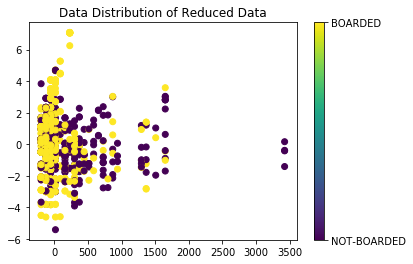

In [96]:
X_transformed = pca.transform(X)

%matplotlib inline
fig = plt.figure()

cax = plt.scatter(X_transformed[:,0], X_transformed[:,1], c = Y[:,0])
plt.title('Data Distribution of Reduced Data')

cbar = fig.colorbar(cax, ticks=[0, 1])
cbar.ax.set_yticklabels(['NOT-BOARDED','BOARDED'])

## Splitting Dataset

In [97]:
random_seed = 10
X_train, Y_train, X_test, Y_test = du.split_data(X, Y, train_ratio = 0.8, random_state = random_seed)
X_val, Y_val, X_test, Y_test = du.split_data(X_test, Y_test, train_ratio = 0.5, random_state = random_seed)

In [98]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1048, 7)
(1048, 1)
(131, 7)
(131, 1)


In [99]:
print(X_val.shape)

(131, 7)


In [100]:
print(X.shape)

(1310, 7)


## KNN Classifier

In [101]:
# (no. of neighbours, minkowski parameter) 
knn_parameters = [(1, 1), (5, 1), (10, 1), (15, 1), 
                  (1, 2), (5, 2), (10, 2), (15, 2),
                  (1, 3), (5, 3), (10, 3), (15, 3), 
                  (1, np.inf), (5, np.inf), (10, np.inf), (15, np.inf), 
                  (1, -np.inf), (5, -np.inf), (10, -np.inf), (15, -np.inf)]

    
for k1,p1 in knn_parameters:
    model = knn.knn_model(k = k1, p = p1)
    model.train(X_train, Y_train)
    Y_pred = model.predict(X_val)
    
    print("Number of Neighbours = %s , Minkowski Parameter = %s" % (str(k1), str(p1)))
    print("Accuracy on Dev Set = ", pu.model_accuracy(Y_pred, Y_val))
    print("Precision per Class")
    print(pu.model_precision(Y_pred, Y_val, 2).T[0, :])
    print("Recall per Class")
    print(pu.model_recall(Y_pred, Y_val, 2).T[0, :])
    print("F1 Score per Class")
    print(pu.model_f1(Y_pred, Y_val, 2).T[0, :])
    print("Macro Average Precision, Recall and F1 Score")
    print(pu.model_macro_average(Y_pred, Y_val, 2))
    print("Micro Average Precision, Recall and F1 Score")
    print(pu.model_micro_average(Y_pred, Y_val, 2))
    
    print()
    print()

Number of Neighbours = 1 , Minkowski Parameter = 1
Accuracy on Dev Set =  0.7022900763358778
Precision per Class
[0.57692308 0.78481013]
Recall per Class
[0.63829787 0.73809524]
F1 Score per Class
[0.60606061 0.7607362 ]
Macro Average Precision, Recall and F1 Score
[0.6808666  0.68819656 0.68451196]
Micro Average Precision, Recall and F1 Score
[0.70229008 0.70229008 0.70229008]


Number of Neighbours = 5 , Minkowski Parameter = 1
Accuracy on Dev Set =  0.7251908396946565
Precision per Class
[0.6122449  0.79268293]
Recall per Class
[0.63829787 0.77380952]
F1 Score per Class
[0.625      0.78313253]
Macro Average Precision, Recall and F1 Score
[0.70246391 0.7060537  0.70425423]
Micro Average Precision, Recall and F1 Score
[0.72519084 0.72519084 0.72519084]


Number of Neighbours = 10 , Minkowski Parameter = 1
Accuracy on Dev Set =  0.732824427480916
Precision per Class
[0.61538462 0.81012658]
Recall per Class
[0.68085106 0.76190476]
F1 Score per Class
[0.64646465 0.78527607]
Macro Average

/home/harsh/Desktop/ell_assmt/ELL409_Assign_1-master/src/performance_util.py:27: RuntimeWarning: invalid value encountered in true_divide
  return tp/tp_fp


## testing using knn

In [141]:
# (no. of neighbours, minkowski parameter) 
knn_parameters = [(15, 1), 
                  (1, 3) ]

    
for k1,p1 in knn_parameters:
    model = knn.knn_model(k = k1, p = p1)
    model.train(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    print("Number of Neighbours = %s , Minkowski Parameter = %s" % (str(k1), str(p1)))
    print("Accuracy on Dev Set = ", pu.model_accuracy(Y_pred, Y_test))
    print("Precision per Class")
    print(pu.model_precision(Y_pred, Y_test, 2).T[0, :])
    print("Recall per Class")
    print(pu.model_recall(Y_pred, Y_test, 2).T[0, :])
    print("F1 Score per Class")
    print(pu.model_f1(Y_pred, Y_test, 2).T[0, :])
    print("Macro Average Precision, Recall and F1 Score")
    print(pu.model_macro_average(Y_pred, Y_test, 2))
    print("Micro Average Precision, Recall and F1 Score")
    print(pu.model_micro_average(Y_pred, Y_test, 2))
    
    print()
    print()

Number of Neighbours = 15 , Minkowski Parameter = 1
Accuracy on Dev Set =  0.7709923664122137
Precision per Class
[0.73076923 0.79746835]
Recall per Class
[0.7037037  0.81818182]
F1 Score per Class
[0.71698113 0.80769231]
Macro Average Precision, Recall and F1 Score
[0.76411879 0.76094276 0.76252747]
Micro Average Precision, Recall and F1 Score
[0.77099237 0.77099237 0.77099237]


Number of Neighbours = 1 , Minkowski Parameter = 3
Accuracy on Dev Set =  0.7099236641221374
Precision per Class
[0.67391304 0.72941176]
Recall per Class
[0.57407407 0.80519481]
F1 Score per Class
[0.62      0.7654321]
Macro Average Precision, Recall and F1 Score
[0.7016624  0.68963444 0.69559643]
Micro Average Precision, Recall and F1 Score
[0.70992366 0.70992366 0.70992366]




## Bayes with normal density

In [114]:
dimension = X_train.shape[1]
params = [dimension]

model1 = bayes.bayes_classifier(estimator_type = 'Gaussian', param = params)
model1.train(X_train, Y_train)
Y_pred = model1.predict(X_val)

print("Accuracy on Dev Set = ", pu.model_accuracy(Y_pred, Y_val))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_val, 2).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_val, 2).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_val, 2).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_val, 2))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_val, 2))
    
print()
print()



Class 0


AttributeError: 'NoneType' object has no attribute 'estimate_parameters'

## Bayes with GMM

In [103]:
dimension = X_train.shape[1]

gmm_parameters = [[2, 0.01, 100, dimension, 0.0001],  [2, 0.001, 100, dimension, 0.0001],
                  [2, 0.0001, 100, dimension, 0.0001],[2, 0.00001, 100, dimension, 0.0001],
                  [3, 0.01, 100, dimension, 0.0001],  [3, 0.001, 100, dimension, 0.0001],
                  [3, 0.0001, 100, dimension, 0.0001],[3, 0.00001, 100, dimension, 0.0001],
                  [4, 0.01, 100, dimension, 0.0001],  [4, 0.001, 100, dimension, 0.0001],
                  [4, 0.0001, 100, dimension, 0.0001],[4, 0.00001, 100, dimension, 0.0001],
                  [5, 0.01, 100, dimension, 0.0001],  [5, 0.001, 100, dimension, 0.0001],
                  [5, 0.0001, 100, dimension, 0.0001],[5, 0.00001, 100, dimension, 0.0001],
                 [1, 0.01, 100, dimension, 0.0001],  [1, 0.001, 100, dimension, 0.0001]]

    
for par in gmm_parameters:
    model = bayes.bayes_classifier(estimator_type = 'GMM', param = par)
    model.train(X_train, Y_train)
    Y_pred = model.predict(X_val)
    
    print("Number of Components = %s , Number of max EM iterations = %s" % (str(par[0]), str(par[2])))
    print("Accuracy on Dev Set = ", pu.model_accuracy(Y_pred, Y_val))
    print("Precision per Class")
    print(pu.model_precision(Y_pred, Y_val, 2).T[0, :])
    print("Recall per Class")
    print(pu.model_recall(Y_pred, Y_val, 2).T[0, :])
    print("F1 Score per Class")
    print(pu.model_f1(Y_pred, Y_val, 2).T[0, :])
    print("Macro Average Precision, Recall and F1 Score")
    print(pu.model_macro_average(Y_pred, Y_val, 2))
    print("Micro Average Precision, Recall and F1 Score")
    print(pu.model_micro_average(Y_pred, Y_val, 2))
    
    print()
    print()


Class 0
Converged after 70 iterations
Class 1
Converged after 17 iterations
Number of Components = 2 , Number of max EM iterations = 100
Accuracy on Dev Set =  0.7175572519083969
Precision per Class
[0.67857143 0.72815534]
Recall per Class
[0.40425532 0.89285714]
F1 Score per Class
[0.50666667 0.80213904]
Macro Average Precision, Recall and F1 Score
[0.70336338 0.64855623 0.67484886]
Micro Average Precision, Recall and F1 Score
[0.71755725 0.71755725 0.71755725]


Class 0
Converged after 94 iterations
Class 1
Converged after 39 iterations
Number of Components = 2 , Number of max EM iterations = 100
Accuracy on Dev Set =  0.7175572519083969
Precision per Class
[0.67857143 0.72815534]
Recall per Class
[0.40425532 0.89285714]
F1 Score per Class
[0.50666667 0.80213904]
Macro Average Precision, Recall and F1 Score
[0.70336338 0.64855623 0.67484886]
Micro Average Precision, Recall and F1 Score
[0.71755725 0.71755725 0.71755725]


Class 0
Converged after 2 iterations
Class 1
Converged after 2

## Kmeans

In [142]:
from kmeans import kmeans
model2 = kmeans(2,1500)
model2.train(X_train)
labels = model2.train_labels
centroids = model2.centroids

In [145]:
Y_pred = model2.predict(X_val)

print("Accuracy on Dev Set = ", pu.model_accuracy(Y_pred, Y_val))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_val, 2).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_val, 2).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_val, 2).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_val, 2))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_val, 2))
    
print()
print()


Accuracy on Dev Set =  49.541984732824424
Precision per Class
Recall per Class
F1 Score per Class
Micro Average Precision, Recall and F1 Score


ValueError: operands could not be broadcast together with shapes (2,262) (2,131) 

[Text(1,0,'NOT-BOARDED'), Text(1,0,'BOARDED')]

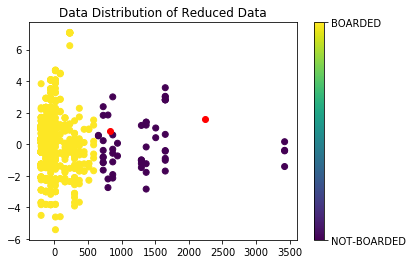

In [110]:
X_transformed = pca.transform(X_train)

%matplotlib inline
fig = plt.figure()

cax = plt.scatter(X_transformed[:,0], X_transformed[:,1], c = labels)
plt.scatter(centroids[:,0],centroids[:,1],c='red')
plt.title('Data Distribution of Reduced Data')

cbar = fig.colorbar(cax, ticks=[0, 1])
cbar.ax.set_yticklabels(['NOT-BOARDED','BOARDED'])

## Centroids look inappropriate as they are transformed later after training on untransformed data

## Naive Bayes

In [119]:
#'budget', 'memberCount',  'age','first_class','second_class','third_class','female'
from naive_bayes_classifier import naive_bayes_classifier
parameters = [[1, 0.001, 20, 1, 0.0001]]*7
#parameters = []
#distributions = ['Gaussian', 'Multinomial', 'Multinomial','Multinomial','Multinomial','Multinomial','Multinomial']
distributions = ['GMM','GMM','GMM','GMM','GMM','GMM','GMM']
model1 = naive_bayes_classifier(param = parameters, distrib = distributions)
model1.train(X_train, Y_train)

print("Train complete")


Y_pred = model1.predict(X_val)

print("Accuracy on Dev Set = ", pu.model_accuracy(Y_pred, Y_val))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_val, 2).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_val, 2).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_val, 2).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_val, 2))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_val, 2))
    
print()
print()


Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Train complete
Accuracy on Dev Set =  0.6412213740458015
Precision per Class
[       nan 0.64122137]
Recall per Class
[0. 1.]
F1 Score per Class
[       nan 0.78139535]
Macro Average Precision, Recall and F1 Score
[nan 0.5 nan]
Micro Average Precision, Recall and F1 Score
[0.64122137 0.64122137 0.64122137]




/home/harsh/Desktop/ell_assmt/ELL409_Assign_1-master/src/performance_util.py:27: RuntimeWarning: invalid value encountered in true_divide
  return tp/tp_fp


In [122]:
#'budget', 'memberCount',  'age','first_class','second_class','third_class','female'
from naive_bayes_classifier import naive_bayes_classifier
parameters = [[1, 0.001, 20, 1, 0.0001]]*3
#parameters = []
#distributions = ['Gaussian', 'Multinomial', 'Multinomial','Multinomial','Multinomial','Multinomial','Multinomial']
distributions = ['GMM','GMM','GMM','Binomial','Binomial','Binomial','Binomial']
model1 = naive_bayes_classifier(param = parameters, distrib = distributions)
model1.train(X_train, Y_train)

print("Train complete")


Y_pred = model1.predict(X_val)

print("Accuracy on Dev Set = ", pu.model_accuracy(Y_pred, Y_val))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_val, 2).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_val, 2).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_val, 2).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_val, 2))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_val, 2))
    
print()
print()


Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations


AttributeError: 'NoneType' object has no attribute 'estimate_parameters'

In [123]:
dimension = X_train.shape[1]

gmm_parameters = [[2, 0.01, 100, dimension, 0.0001],  [2, 0.001, 100, dimension, 0.0001],
                  [2, 0.0001, 100, dimension, 0.0001],[2, 0.00001, 100, dimension, 0.0001],
                  [3, 0.01, 100, dimension, 0.0001],  [3, 0.001, 100, dimension, 0.0001],
                  [3, 0.0001, 100, dimension, 0.0001],[3, 0.00001, 100, dimension, 0.0001],
                  [4, 0.01, 100, dimension, 0.0001],  [4, 0.001, 100, dimension, 0.0001],
                  [4, 0.0001, 100, dimension, 0.0001],[4, 0.00001, 100, dimension, 0.0001],
                  [5, 0.01, 100, dimension, 0.0001],  [5, 0.001, 100, dimension, 0.0001],
                  [5, 0.0001, 100, dimension, 0.0001],[5, 0.00001, 100, dimension, 0.0001],
                 [1, 0.01, 100, dimension, 0.0001],  [1, 0.001, 100, dimension, 0.0001]]

    
for par in gmm_parameters:
    model = bayes.bayes_classifier(estimator_type = 'GMM', param = par)
    model.train(X_train, Y_train)
    Y_pred = model.predict(X_val)
    
    print("Number of Components = %s , Number of max EM iterations = %s" % (str(par[0]), str(par[2])))
    print("Accuracy on Dev Set = ", pu.model_accuracy(Y_pred, Y_val))
    print("Precision per Class")
    print(pu.model_precision(Y_pred, Y_val, 2).T[0, :])
    print("Recall per Class")
    print(pu.model_recall(Y_pred, Y_val, 2).T[0, :])
    print("F1 Score per Class")
    print(pu.model_f1(Y_pred, Y_val, 2).T[0, :])
    print("Macro Average Precision, Recall and F1 Score")
    print(pu.model_macro_average(Y_pred, Y_val, 2))
    print("Micro Average Precision, Recall and F1 Score")
    print(pu.model_micro_average(Y_pred, Y_val, 2))
    
    print()
    print()


Class 0
Converged after 66 iterations
Class 1
Converged after 32 iterations
Number of Components = 2 , Number of max EM iterations = 100
Accuracy on Dev Set =  0.7175572519083969
Precision per Class
[0.67857143 0.72815534]
Recall per Class
[0.40425532 0.89285714]
F1 Score per Class
[0.50666667 0.80213904]
Macro Average Precision, Recall and F1 Score
[0.70336338 0.64855623 0.67484886]
Micro Average Precision, Recall and F1 Score
[0.71755725 0.71755725 0.71755725]


Class 0
Didn't converge, ran for 100 iterations
Class 1
Converged after 19 iterations
Number of Components = 2 , Number of max EM iterations = 100
Accuracy on Dev Set =  0.7175572519083969
Precision per Class
[0.67857143 0.72815534]
Recall per Class
[0.40425532 0.89285714]
F1 Score per Class
[0.50666667 0.80213904]
Macro Average Precision, Recall and F1 Score
[0.70336338 0.64855623 0.67484886]
Micro Average Precision, Recall and F1 Score
[0.71755725 0.71755725 0.71755725]


Class 0
Didn't converge, ran for 100 iterations
Clas

## best gmm params: [3, 0.01, 100, dimension, 0.0001],

In [124]:
#'budget', 'memberCount',  'age','first_class','second_class','third_class','female'
from naive_bayes_classifier import naive_bayes_classifier
parameters = [ [3, 0.01, 100, dimension, 0.0001]]*7
#parameters = []
#distributions = ['Gaussian', 'Multinomial', 'Multinomial','Multinomial','Multinomial','Multinomial','Multinomial']
distributions = ['GMM','GMM','GMM','GMM','GMM','GMM','GMM']
model1 = naive_bayes_classifier(param = parameters, distrib = distributions)
model1.train(X_train, Y_train)

print("Train complete")


Y_pred = model1.predict(X_val)

print("Accuracy on Dev Set = ", pu.model_accuracy(Y_pred, Y_val))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_val, 2).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_val, 2).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_val, 2).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_val, 2))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_val, 2))
    
print()
print()


Converged after 94 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Didn't converge, ran for 100 iterations
Didn't converge, ran for 100 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Train complete


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (1,131,3)->(1,newaxis,3,131) (7,7,3)->(7,3,7) 

In [125]:
#'budget', 'memberCount',  'age','first_class','second_class','third_class','female'
from naive_bayes_classifier import naive_bayes_classifier
parameters = [[1, 0.001, 20, 1, 0.0001]]*7
#parameters = []
#distributions = ['Gaussian', 'Multinomial', 'Multinomial','Multinomial','Multinomial','Multinomial','Multinomial']
distributions = ['GMM','GMM','GMM','GMM','GMM','GMM','GMM']
model1 = naive_bayes_classifier(param = parameters, distrib = distributions)
model1.train(X_train, Y_train)

print("Train complete")


Y_pred = model1.predict(X_val)

print("Accuracy on Dev Set = ", pu.model_accuracy(Y_pred, Y_val))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_val, 2).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_val, 2).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_val, 2).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_val, 2))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_val, 2))
    
print()
print()


Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Train complete
Accuracy on Dev Set =  0.6412213740458015
Precision per Class
[       nan 0.64122137]
Recall per Class
[0. 1.]
F1 Score per Class
[       nan 0.78139535]
Macro Average Precision, Recall and F1 Score
[nan 0.5 nan]
Micro Average Precision, Recall and F1 Score
[0.64122137 0.64122137 0.64122137]




/home/harsh/Desktop/ell_assmt/ELL409_Assign_1-master/src/performance_util.py:27: RuntimeWarning: invalid value encountered in true_divide
  return tp/tp_fp


In [126]:
#'budget', 'memberCount',  'age','first_class','second_class','third_class','female'
from naive_bayes_classifier import naive_bayes_classifier
parameters = [[1, 0.01, 20, 1, 0.0001]]*7
#parameters = []
#distributions = ['Gaussian', 'Multinomial', 'Multinomial','Multinomial','Multinomial','Multinomial','Multinomial']
distributions = ['GMM','GMM','GMM','GMM','GMM','GMM','GMM']
model1 = naive_bayes_classifier(param = parameters, distrib = distributions)
model1.train(X_train, Y_train)

print("Train complete")


Y_pred = model1.predict(X_val)

print("Accuracy on Dev Set = ", pu.model_accuracy(Y_pred, Y_val))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_val, 2).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_val, 2).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_val, 2).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_val, 2))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_val, 2))
    
print()
print()


Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Train complete
Accuracy on Dev Set =  0.6412213740458015
Precision per Class
[       nan 0.64122137]
Recall per Class
[0. 1.]
F1 Score per Class
[       nan 0.78139535]
Macro Average Precision, Recall and F1 Score
[nan 0.5 nan]
Micro Average Precision, Recall and F1 Score
[0.64122137 0.64122137 0.64122137]




/home/harsh/Desktop/ell_assmt/ELL409_Assign_1-master/src/performance_util.py:27: RuntimeWarning: invalid value encountered in true_divide
  return tp/tp_fp


In [127]:
#'budget', 'memberCount',  'age','first_class','second_class','third_class','female'
from naive_bayes_classifier import naive_bayes_classifier
parameters = [[1, 0.0001, 20, 1, 0.0001]]*7
#parameters = []
#distributions = ['Gaussian', 'Multinomial', 'Multinomial','Multinomial','Multinomial','Multinomial','Multinomial']
distributions = ['GMM','GMM','GMM','GMM','GMM','GMM','GMM']
model1 = naive_bayes_classifier(param = parameters, distrib = distributions)
model1.train(X_train, Y_train)

print("Train complete")


Y_pred = model1.predict(X_val)

print("Accuracy on Dev Set = ", pu.model_accuracy(Y_pred, Y_val))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_val, 2).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_val, 2).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_val, 2).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_val, 2))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_val, 2))
    
print()
print()


Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Train complete
Accuracy on Dev Set =  0.6412213740458015
Precision per Class
[       nan 0.64122137]
Recall per Class
[0. 1.]
F1 Score per Class
[       nan 0.78139535]
Macro Average Precision, Recall and F1 Score
[nan 0.5 nan]
Micro Average Precision, Recall and F1 Score
[0.64122137 0.64122137 0.64122137]




/home/harsh/Desktop/ell_assmt/ELL409_Assign_1-master/src/performance_util.py:27: RuntimeWarning: invalid value encountered in true_divide
  return tp/tp_fp


In [128]:
#'budget', 'memberCount',  'age','first_class','second_class','third_class','female'
from naive_bayes_classifier import naive_bayes_classifier
parameters = [[1, 0.00001, 20, 1, 0.0001]]*7
#parameters = []
#distributions = ['Gaussian', 'Multinomial', 'Multinomial','Multinomial','Multinomial','Multinomial','Multinomial']
distributions = ['GMM','GMM','GMM','GMM','GMM','GMM','GMM']
model1 = naive_bayes_classifier(param = parameters, distrib = distributions)
model1.train(X_train, Y_train)

print("Train complete")


Y_pred = model1.predict(X_val)

print("Accuracy on Dev Set = ", pu.model_accuracy(Y_pred, Y_val))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_val, 2).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_val, 2).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_val, 2).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_val, 2))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_val, 2))
    
print()
print()


Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations
Train complete
Accuracy on Dev Set =  0.6412213740458015
Precision per Class
[       nan 0.64122137]
Recall per Class
[0. 1.]
F1 Score per Class
[       nan 0.78139535]
Macro Average Precision, Recall and F1 Score
[nan 0.5 nan]
Micro Average Precision, Recall and F1 Score
[0.64122137 0.64122137 0.64122137]




/home/harsh/Desktop/ell_assmt/ELL409_Assign_1-master/src/performance_util.py:27: RuntimeWarning: invalid value encountered in true_divide
  return tp/tp_fp


## testing

In [130]:
dimension = X_train.shape[1]

gmm_parameters = [#[2, 0.01, 100, dimension, 0.0001],  [2, 0.001, 100, dimension, 0.0001],
                  #[2, 0.0001, 100, dimension, 0.0001],[2, 0.00001, 100, dimension, 0.0001],
                  [3, 0.01, 100, dimension, 0.0001],  [3, 0.001, 100, dimension, 0.0001]
                  #[3, 0.0001, 100, dimension, 0.0001],[3, 0.00001, 100, dimension, 0.0001],
                  #[4, 0.01, 100, dimension, 0.0001],  [4, 0.001, 100, dimension, 0.0001],
                  #[4, 0.0001, 100, dimension, 0.0001],[4, 0.00001, 100, dimension, 0.0001],
                  #[5, 0.01, 100, dimension, 0.0001],  [5, 0.001, 100, dimension, 0.0001],
                  #[5, 0.0001, 100, dimension, 0.0001],[5, 0.00001, 100, dimension, 0.0001],
                 #[1, 0.01, 100, dimension, 0.0001],  [1, 0.001, 100, dimension, 0.0001]
                    ]

    
for par in gmm_parameters:
    model = bayes.bayes_classifier(estimator_type = 'GMM', param = par)
    model.train(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    print("Number of Components = %s , Number of max EM iterations = %s" % (str(par[0]), str(par[2])))
    print("Accuracy on test Set = ", pu.model_accuracy(Y_pred, Y_test))
    print("Precision per Class")
    print(pu.model_precision(Y_pred, Y_test, 2).T[0, :])
    print("Recall per Class")
    print(pu.model_recall(Y_pred, Y_test, 2).T[0, :])
    print("F1 Score per Class")
    print(pu.model_f1(Y_pred, Y_test, 2).T[0, :])
    print("Macro Average Precision, Recall and F1 Score")
    print(pu.model_macro_average(Y_pred, Y_test, 2))
    print("Micro Average Precision, Recall and F1 Score")
    print(pu.model_micro_average(Y_pred, Y_test, 2))
    
    print()
    print()

Class 0
Converged after 56 iterations
Class 1
Converged after 22 iterations
Number of Components = 3 , Number of max EM iterations = 100
Accuracy on test Set =  0.7709923664122137
Precision per Class
[0.78571429 0.76404494]
Recall per Class
[0.61111111 0.88311688]
F1 Score per Class
[0.6875     0.81927711]
Macro Average Precision, Recall and F1 Score
[0.77487961 0.747114   0.76074354]
Micro Average Precision, Recall and F1 Score
[0.77099237 0.77099237 0.77099237]


Class 0
Converged after 72 iterations
Class 1
Converged after 25 iterations
Number of Components = 3 , Number of max EM iterations = 100
Accuracy on test Set =  0.7709923664122137
Precision per Class
[0.78571429 0.76404494]
Recall per Class
[0.61111111 0.88311688]
F1 Score per Class
[0.6875     0.81927711]
Macro Average Precision, Recall and F1 Score
[0.77487961 0.747114   0.76074354]
Micro Average Precision, Recall and F1 Score
[0.77099237 0.77099237 0.77099237]




## after pca

In [139]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components = 2)
pca2.fit(X_train)
print(np.sum(pca2.explained_variance_ratio_))
X_train_trans = pca2.transform(X_train)
X_test_trans = pca2.transform(X_test)

0.9999813679467057


In [138]:
dimension = X_train_trans.shape[1]

gmm_parameters = [#[2, 0.01, 100, dimension, 0.0001],  [2, 0.001, 100, dimension, 0.0001],
                  #[2, 0.0001, 100, dimension, 0.0001],[2, 0.00001, 100, dimension, 0.0001],
                  [3, 0.01, 100, dimension, 0.0001],  [3, 0.001, 100, dimension, 0.0001]
                  #[3, 0.0001, 100, dimension, 0.0001],[3, 0.00001, 100, dimension, 0.0001],
                  #[4, 0.01, 100, dimension, 0.0001],  [4, 0.001, 100, dimension, 0.0001],
                  #[4, 0.0001, 100, dimension, 0.0001],[4, 0.00001, 100, dimension, 0.0001],
                  #[5, 0.01, 100, dimension, 0.0001],  [5, 0.001, 100, dimension, 0.0001],
                  #[5, 0.0001, 100, dimension, 0.0001],[5, 0.00001, 100, dimension, 0.0001],
                 #[1, 0.01, 100, dimension, 0.0001],  [1, 0.001, 100, dimension, 0.0001]
                    ]

    
for par in gmm_parameters:
    model = bayes.bayes_classifier(estimator_type = 'GMM', param = par)
    model.train(X_train_trans, Y_train)
    Y_pred = model.predict(X_test_trans)
    
    print("Number of Components = %s , Number of max EM iterations = %s" % (str(par[0]), str(par[2])))
    print("Accuracy on test Set = ", pu.model_accuracy(Y_pred, Y_test))
    print("Precision per Class")
    print(pu.model_precision(Y_pred, Y_test, 2).T[0, :])
    print("Recall per Class")
    print(pu.model_recall(Y_pred, Y_test, 2).T[0, :])
    print("F1 Score per Class")
    print(pu.model_f1(Y_pred, Y_test, 2).T[0, :])
    print("Macro Average Precision, Recall and F1 Score")
    print(pu.model_macro_average(Y_pred, Y_test, 2))
    print("Micro Average Precision, Recall and F1 Score")
    print(pu.model_micro_average(Y_pred, Y_test, 2))
    
    print()
    print()

Class 0
Converged after 5 iterations
Class 1
Converged after 6 iterations
Number of Components = 3 , Number of max EM iterations = 100
Accuracy on test Set =  0.5725190839694656
Precision per Class
[0.25       0.58267717]
Recall per Class
[0.01851852 0.96103896]
F1 Score per Class
[0.03448276 0.7254902 ]
Macro Average Precision, Recall and F1 Score
[0.41633858 0.48977874 0.45008253]
Micro Average Precision, Recall and F1 Score
[0.57251908 0.57251908 0.57251908]


Class 0
Converged after 6 iterations
Class 1
Converged after 8 iterations
Number of Components = 3 , Number of max EM iterations = 100
Accuracy on test Set =  0.5725190839694656
Precision per Class
[0.25       0.58267717]
Recall per Class
[0.01851852 0.96103896]
F1 Score per Class
[0.03448276 0.7254902 ]
Macro Average Precision, Recall and F1 Score
[0.41633858 0.48977874 0.45008253]
Micro Average Precision, Recall and F1 Score
[0.57251908 0.57251908 0.57251908]


